In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the data
data = pd.read_csv('snp_prices.csv')
data.head()

Date          A        AAL       AAPL       ABBV  ABNB        ABT  \
0  2014-06-16  38.350636  38.708969  20.416189  35.777485   NaN  32.954784   
1  2014-06-17  38.712307  39.472584  20.389618  35.976238   NaN  32.921761   
2  2014-06-18  38.975330  40.217354  20.411760  36.155144   NaN  33.342979   
3  2014-06-19  38.547913  40.594448  20.340904  35.903358   NaN  33.863323   
4  2014-06-20  38.646545  41.999138  20.130541  35.313709   NaN  33.739429   

        ACGL        ACN       ADBE  ...        WTW         WY        WYNN  \
0  19.000000  69.856163  67.620003  ...  96.144753  20.665981  169.980606   
1  19.146667  69.594681  67.540001  ...  96.525070  20.712856  168.554993   
2  19.116667  69.746521  73.080002  ...  97.710968  20.665981  170.219650   
3  19.236668  70.058601  72.949997  ...  97.531990  20.672680  172.959885   
4  19.180000  70.117630  72.610001  ...  97.845222  20.813303  171.406235   

         XEL        XOM        XYL        YUM        ZBH       ZBRA        ZTS  
0  22.322598  67.248253  33.835812  47.015118  94.154083  76.110001  29.901205  
1  22.337185  66.921547  33.932579  47.246914  93.929871  82.910004  30.534042  
2  22.927883  67.124100  34.231617  47.359852  95.095810  78.870003  30.608494  
3  23.088318  67.058769  34.601006  47.769958  94.737053  78.830002  30.292076  
4  23.037273  67.842850  34.891251  47.847237  94.692215  78.889999  30.208313  

[5 rows x 504 columns]

## Descriptive Analysis

In [3]:
data.describe()

A          AAL         AAPL         ABBV        ABNB  \
count  2518.000000  2518.000000  2518.000000  2518.000000  883.000000   
mean     84.463043    29.142824    83.353277    83.424657  141.012843   
std      40.377762    13.043630    59.316317    40.247918   27.510917   
min      31.138300     9.040000    19.991043    33.530441   82.489998   
25%      44.652958    15.762500    28.907155    46.711650  118.480000   
50%      71.421967    30.179407    51.015192    71.793709  142.729996   
75%     124.588026    40.412356   143.570652   114.621483  161.705002   
max     176.085114    56.988728   214.240005   180.415100  216.839996   

               ABT         ACGL          ACN         ADBE          ADI  ...  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000  ...   
mean     73.406413    38.959359   189.166244   295.194539   106.252705  ...   
std      30.992381    19.055317    91.067700   177.606598    49.911816  ...   
min      31.174767    17.766666    64.247101    60.880001    35.037411  ...   
25%      39.567137    26.410000   104.741304   108.102503    62.671255  ...   
50%      72.783672    32.130001   166.144257   276.534988    97.303028  ...   
75%     103.864500    43.917500   274.933792   454.014992   153.913006  ...   
max     135.071213   103.360001   400.401367   688.369995   239.208511  ...   

               WTW           WY         WYNN          XEL          XOM  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean    167.830643    25.988706   105.043118    46.867932    65.901007   
std      51.426592     4.946751    30.174026    14.471513    21.274252   
min      89.668861    11.455631    42.474361    21.615211    25.646790   
25%     113.723473    22.157993    84.551214    33.473165    55.382682   
50%     167.433067    24.994164   100.731724    50.168886    59.642128   
75%     211.750233    29.693130   124.126389    60.049333    66.821901   
max     276.678986    38.842873   187.941742    72.332924   122.199997   

               XYL          YUM          ZBH         ZBRA          ZTS  
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000  
mean     72.240377    86.261180   115.750671   217.910167   109.954474  
std      29.718411    29.999413    16.952375   141.012818    57.224561  
min      27.190428    40.326466    75.791985    46.930000    29.584795  
25%      45.339649    56.207417   104.600893    92.129997    49.675945  
50%      71.197487    84.582333   113.616089   199.320007   104.989002  
75%      96.071928   113.495678   125.590940   288.022499   163.371944  
max     145.569122   142.489777   169.488892   614.549988   241.774734  

[8 rows x 503 columns]

## Stock Movement Plot

In [4]:
import matplotlib.pyplot as plt

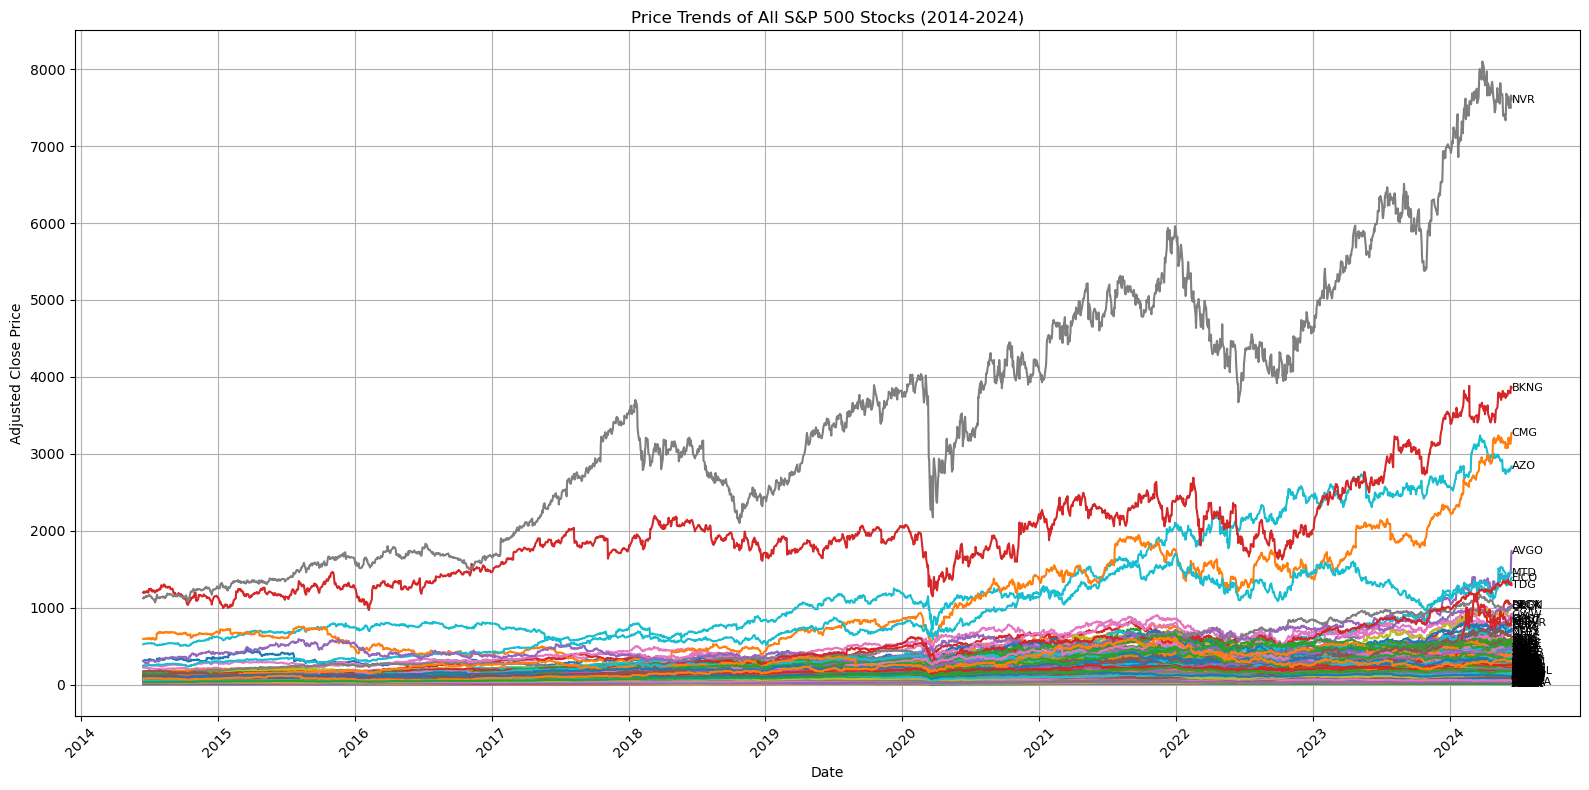

In [5]:
file_path = 'snp_prices.csv'
snp_prices = pd.read_csv(file_path, index_col='Date', parse_dates=True)

plt.figure(figsize=(16, 8))

# add a label to each line
for stock in snp_prices.columns:
    plt.plot(snp_prices.index, snp_prices[stock], label=stock)
    # add a label to the end of each line
    plt.text(snp_prices.index[-1], snp_prices[stock].iloc[-1], stock, fontsize=8, verticalalignment='center')

plt.title('Price Trends of All S&P 500 Stocks (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Moving Averages

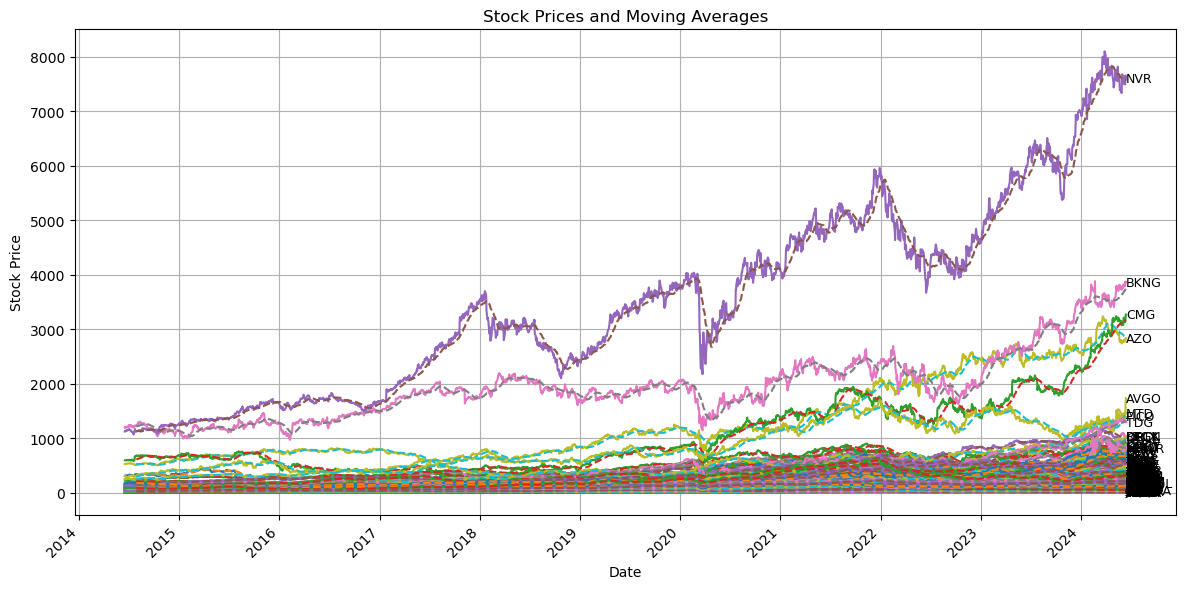

In [6]:
# Calculate moving averages
window_size = 30
df_moving_avg = snp_prices.rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
for column in snp_prices.columns:
    plt.plot(snp_prices.index, snp_prices[column], label=column)
    plt.plot(df_moving_avg.index, df_moving_avg[column], linestyle='--')
    
    # Adding stock names at the end of each line
    last_valid_value = snp_prices[column].dropna().iloc[-1]
    last_valid_date = snp_prices.index[snp_prices[column].notna()][-1]
    plt.text(last_valid_date, last_valid_value, column, fontsize=9, verticalalignment='center')

plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend().set_visible(False)  # Hide the legend to avoid duplication
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Volatility Analysis

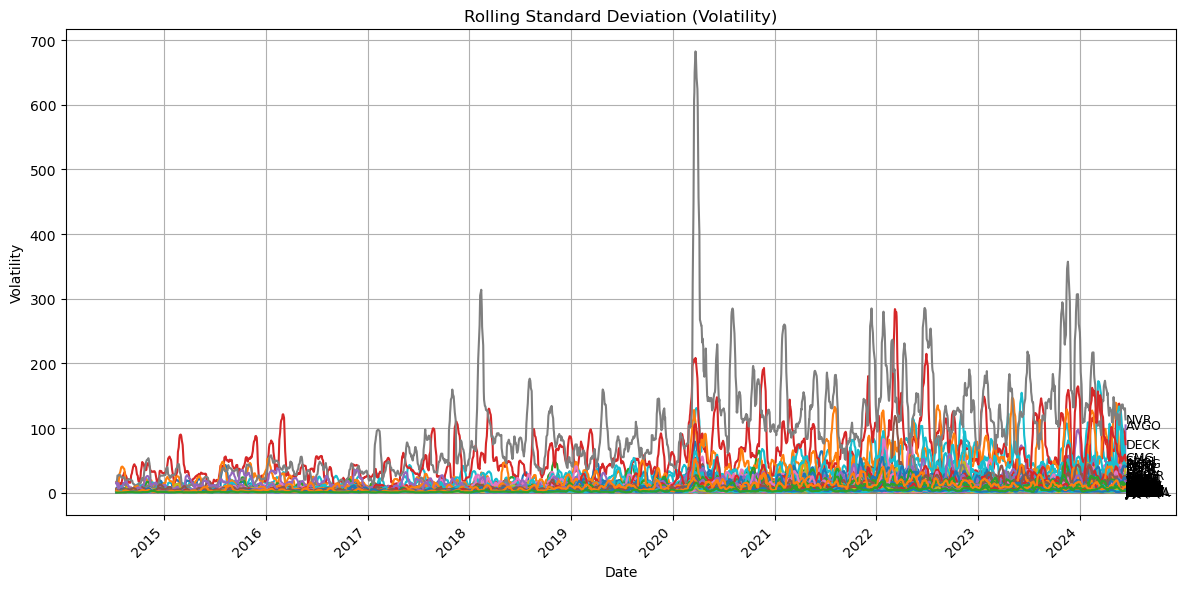

In [7]:
rolling_std = snp_prices.rolling(window=20).std()

plt.figure(figsize=(12, 6))
for column in rolling_std.columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)
    
    # Adding stock names at the end of each line
    last_valid_value = rolling_std[column].dropna().iloc[-1]
    last_valid_date = rolling_std.index[rolling_std[column].notna()][-1]
    plt.text(last_valid_date, last_valid_value, column, fontsize=9, verticalalignment='center')

plt.title('Rolling Standard Deviation (Volatility)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend().set_visible(False)  # Hide the legend to avoid duplication
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Correlation Analysis

In [9]:
# import seaborn as sns

# correlation_matrix = snp_prices.corr()

# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Stock Price Correlation Matrix')
# plt.show()

In [10]:
# Use a mask to display only the lower triangle of the correlation matrix
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# # Draw the heatmap with the mask
# sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, linewidths=0.5)

# plt.title('Stock Price Correlation Matrix')
# plt.show()

## Returns Analysis

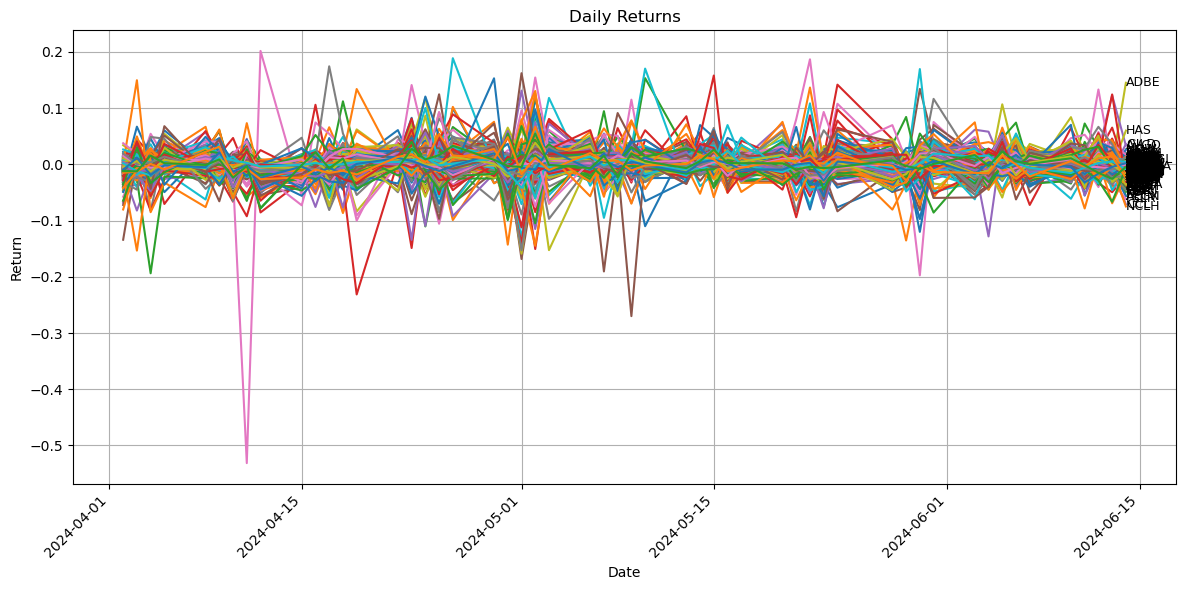

In [11]:
returns = snp_prices.pct_change().dropna()

plt.figure(figsize=(12, 6))
for column in returns.columns:
    plt.plot(returns.index, returns[column], label=column)
    
    # Adding stock names at the end of each line
    last_valid_value = returns[column].dropna().iloc[-1]
    last_valid_date = returns.index[returns[column].notna()][-1]
    plt.text(last_valid_date, last_valid_value, column, fontsize=9, verticalalignment='center')

plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend().set_visible(False)  # Hide the legend to avoid duplication
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [12]:
# Returns Analysis
returns = snp_prices.pct_change().dropna()
returns.describe()

A        AAL       AAPL       ABBV       ABNB        ABT  \
count  53.000000  53.000000  53.000000  53.000000  53.000000  53.000000   
mean   -0.001955  -0.005437   0.004365  -0.001031  -0.001969  -0.001324   
std     0.019770   0.029176   0.017693   0.014722   0.017599   0.010379   
min    -0.096646  -0.135417  -0.021863  -0.053178  -0.068714  -0.030309   
25%    -0.012284  -0.017693  -0.006999  -0.008458  -0.011952  -0.007254   
50%    -0.000518  -0.002602   0.004502  -0.000312  -0.002313  -0.001957   
75%     0.008890   0.007205   0.008627   0.009820   0.010322   0.004423   
max     0.039504   0.066002   0.072649   0.031540   0.032069   0.031745   

            ACGL        ACN       ADBE        ADI  ...        WTW         WY  \
count  53.000000  53.000000  53.000000  53.000000  ...  53.000000  53.000000   
mean    0.001081  -0.003024   0.001140   0.003369  ...  -0.001248  -0.003644   
std     0.013905   0.011827   0.024791   0.022106  ...   0.009825   0.011848   
min    -0.035219  -0.030534  -0.066436  -0.038164  ...  -0.028584  -0.040822   
25%    -0.008120  -0.010831  -0.008416  -0.009723  ...  -0.006992  -0.010656   
50%    -0.000306  -0.001859  -0.002457   0.004000  ...   0.000509  -0.003656   
75%     0.009900   0.005115   0.008702   0.014639  ...   0.005564   0.002580   
max     0.041827   0.022359   0.145115   0.108567  ...   0.017348   0.026821   

            WYNN        XEL        XOM        XYL        YUM        ZBH  \
count  53.000000  53.000000  53.000000  53.000000  53.000000  53.000000   
mean   -0.003271   0.000415  -0.001253   0.001449  -0.000349  -0.003532   
std     0.015214   0.010215   0.011268   0.012010   0.010990   0.011502   
min    -0.054960  -0.026477  -0.027776  -0.026967  -0.041912  -0.032335   
25%    -0.012168  -0.005909  -0.008108  -0.005739  -0.006107  -0.009865   
50%    -0.004284   0.000186  -0.000793   0.003288   0.000000  -0.003856   
75%     0.007137   0.008552   0.005226   0.008971   0.006787   0.002829   
max     0.027391   0.020803   0.028687   0.038409   0.023999   0.027013   

            ZBRA        ZTS  
count  53.000000  53.000000  
mean    0.000172   0.000632  
std     0.017482   0.019232  
min    -0.028537  -0.078351  
25%    -0.012648  -0.006684  
50%    -0.000978  -0.000957  
75%     0.010551   0.008826  
max     0.054048   0.055079  

[8 rows x 503 columns]

## RSI (Relative Strength Index)

In [13]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [14]:

rsi_df = snp_prices.apply(calculate_rsi)
rsi_df.head()

A  AAL  AAPL  ABBV  ABNB  ABT  ACGL  ACN  ADBE  ADI  ...  WTW  \
Date                                                              ...        
2014-06-16 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...  NaN   
2014-06-17 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...  NaN   
2014-06-18 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...  NaN   
2014-06-19 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...  NaN   
2014-06-20 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...  NaN   

            WY  WYNN  XEL  XOM  XYL  YUM  ZBH  ZBRA  ZTS  
Date                                                      
2014-06-16 NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2014-06-17 NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2014-06-18 NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2014-06-19 NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2014-06-20 NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  

[5 rows x 503 columns]

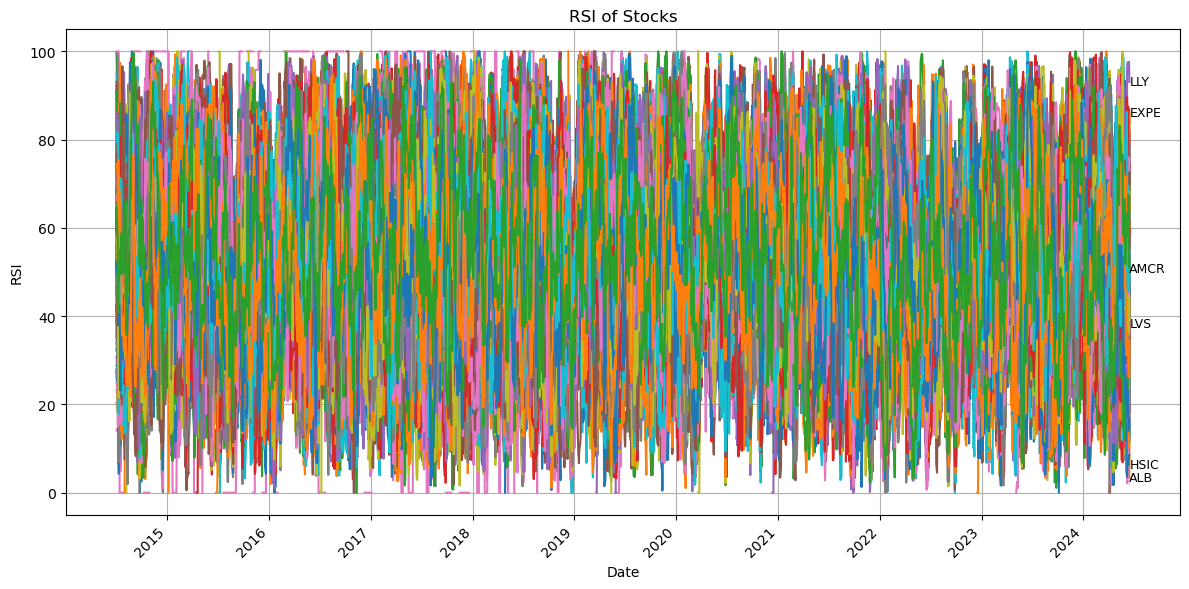

In [15]:
plt.figure(figsize=(12, 6))
for column in rsi_df.columns:
    plt.plot(rsi_df.index, rsi_df[column], label=column)

# Determine which stocks to label
top_labels = rsi_df.iloc[-1].nlargest(2)  # Label top 2 performers
bottom_labels = rsi_df.iloc[-1].nsmallest(2)  # Label bottom 2 performers

# Select 2 equidistant center stocks
sorted_rsi = rsi_df.iloc[-1].sort_values()
middle_indices = np.linspace(0, len(sorted_rsi) - 1, 4, dtype=int)[1:3]
center_labels = sorted_rsi.iloc[middle_indices]

# Combine all labels to display
labels_to_display = top_labels.index.union(bottom_labels.index).union(center_labels.index)

# Adding stock names at the end of each line
for column in rsi_df.columns:
    last_valid_value = rsi_df[column].dropna().iloc[-1]
    last_valid_date = rsi_df.index[rsi_df[column].notna()][-1]
    if column in labels_to_display:
        plt.text(last_valid_date, last_valid_value, column, fontsize=9, verticalalignment='center')

plt.title('RSI of Stocks')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend().set_visible(False)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Overbought and Oversold Conditions:

Overbought: Stocks with RSI values frequently exceeding 70 indicate potential overbought conditions. This suggests that the stocks may be overvalued and could be due for a price correction. For instance, stocks like LEIDOS (LDOS) may have been overbought during several periods, signaling potential sell opportunities to capture gains before a pullback.

Oversold: Stocks with RSI values frequently falling below 30 suggest potential oversold conditions. This indicates that the stocks may be undervalued and could be poised for a rebound. For example, stocks like SLB may have experienced oversold conditions, presenting potential buy opportunities to capitalize on a price recovery.

* Frequent Oscillations:

The RSI values for most stocks frequently oscillate between 30 and 70, reflecting regular cycles of overbought and oversold conditions typical in active trading environments. This cyclical behavior can be leveraged to identify entry and exit points for trades.

Stocks like AAL, SNPS, and BIO exhibit frequent oscillations, suggesting they are actively traded and subject to regular fluctuations in investor sentiment. Monitoring these oscillations can help in timing trades more effectively.

* Volatility Indication:

The frequent oscillations in RSI values indicate that these stocks experience regular price volatility. This volatility can present both opportunities and risks for traders and investors. High volatility stocks may offer significant short-term profit opportunities but also carry higher risk.

Stocks with less frequent RSI oscillations may indicate greater price stability, which could be attractive for long-term investors seeking lower-risk investments. Stable stocks may provide more predictable returns and be less subject to market noise and short-term sentiment shifts.

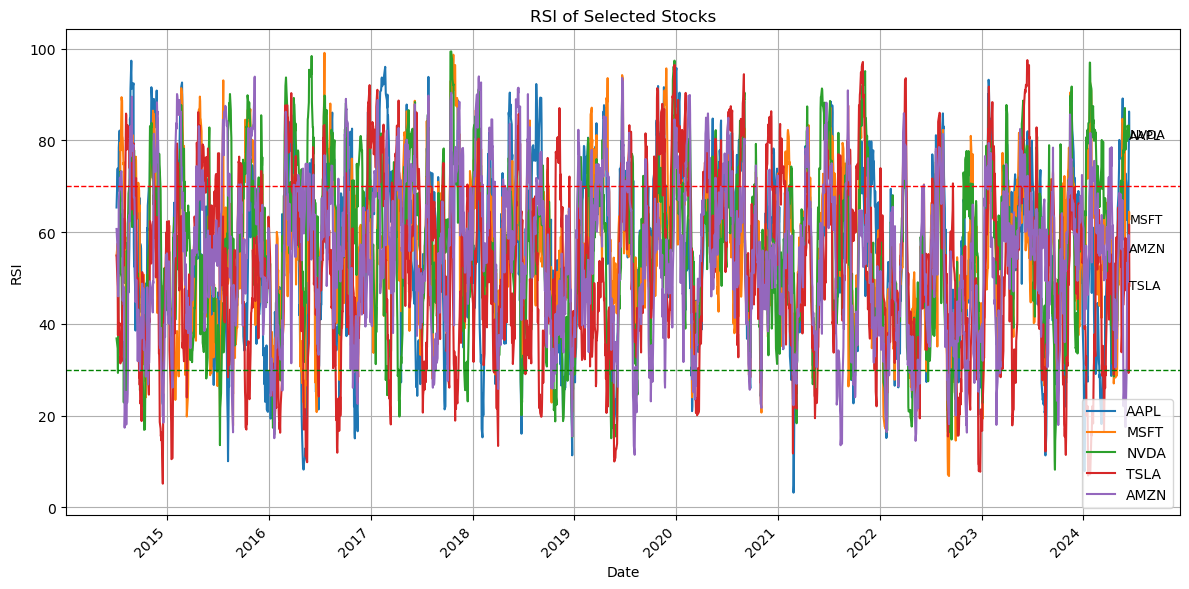

In [16]:
# Selected stocks for clear visualization
selected_stocks = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'AMZN']

plt.figure(figsize=(12, 6))
for column in selected_stocks:
    plt.plot(rsi_df.index, rsi_df[column], label=column)

# Highlight overbought and oversold zones
plt.axhline(70, color='red', linestyle='--', linewidth=1)
plt.axhline(30, color='green', linestyle='--', linewidth=1)

# Adding stock names at the end of each line
for column in selected_stocks:
    last_valid_value = rsi_df[column].dropna().iloc[-1]
    last_valid_date = rsi_df.index[rsi_df[column].notna()][-1]
    plt.text(last_valid_date, last_valid_value, column, fontsize=9, verticalalignment='center')

plt.title('RSI of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Overbrought: AAPL, TSLA, NVDA

* Oversold: AMZN, MSFT

* Frequent oscillations: AAPL, TSLA, NVDA

* High Volatility: TSLA, NVDA

* Low Volatility: MSFT, AMZN

In [18]:
# Add RSI as new columns to the existing DataFrame
for column in snp_prices.columns:
    snp_prices[column + '_RSI'] = calculate_rsi(snp_prices[column])


/tmp/ipykernel_13922/692585323.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  snp_prices[column + '_RSI'] = calculate_rsi(snp_prices[column])
/tmp/ipykernel_13922/692585323.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  snp_prices[column + '_RSI'] = calculate_rsi(snp_prices[column])
/tmp/ipykernel_13922/692585323.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

In [19]:
snp_prices

A        AAL        AAPL        ABBV        ABNB  \
Date                                                                    
2014-06-16   38.350636  38.708969   20.416189   35.777485         NaN   
2014-06-17   38.712307  39.472584   20.389618   35.976238         NaN   
2014-06-18   38.975330  40.217354   20.411760   36.155144         NaN   
2014-06-19   38.547913  40.594448   20.340904   35.903358         NaN   
2014-06-20   38.646545  41.999138   20.130541   35.313709         NaN   
...                ...        ...         ...         ...         ...   
2024-06-10  133.029999  11.490000  193.119995  170.460007  148.070007   
2024-06-11  132.110001  11.280000  207.149994  167.699997  147.750000   
2024-06-12  133.160004  11.500000  213.070007  166.089996  149.320007   
2024-06-13  130.570007  11.440000  214.240005  166.559998  146.100006   
2024-06-14  129.850006  11.280000  212.490005  168.589996  145.970001   

                   ABT        ACGL         ACN        ADBE         ADI  ...  \
Date                                                                    ...   
2014-06-16   32.954784   19.000000   69.856163   67.620003   44.788021  ...   
2014-06-17   32.921761   19.146667   69.594681   67.540001   44.949402  ...   
2014-06-18   33.342979   19.116667   69.746521   73.080002   44.489422  ...   
2014-06-19   33.863323   19.236668   70.058601   72.949997   44.328026  ...   
2014-06-20   33.739429   19.180000   70.117630   72.610001   44.134350  ...   
...                ...         ...         ...         ...         ...  ...   
2024-06-10  107.489998  100.580002  290.429993  459.940002  235.369995  ...   
2024-06-11  105.809998   99.580002  294.220001  462.690002  236.300003  ...   
2024-06-12  104.379997   99.160004  285.730011  459.869995  238.440002  ...   
2024-06-13  103.449997   99.150002  282.320007  458.739990  234.029999  ...   
2024-06-14  103.680000   97.260002  286.709991  525.309998  231.190002  ...   

              WTW_RSI     WY_RSI   WYNN_RSI    XEL_RSI    XOM_RSI    XYL_RSI  \
Date                                                                           
2014-06-16        NaN        NaN        NaN        NaN        NaN        NaN   
2014-06-17        NaN        NaN        NaN        NaN        NaN        NaN   
2014-06-18        NaN        NaN        NaN        NaN        NaN        NaN   
2014-06-19        NaN        NaN        NaN        NaN        NaN        NaN   
2014-06-20        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2024-06-10  56.022932  34.451151  31.303695  45.394022  35.281753  37.375358   
2024-06-11  57.642723  29.596612  31.157763  40.046847  35.115322  35.825989   
2024-06-12  48.905152  33.866068  31.649590  45.059304  37.325916  42.120715   
2024-06-13  60.000036  37.611070  34.509497  52.213733  39.715483  44.609612   
2024-06-14  56.257534  35.808775  27.230060  54.788152  37.831755  39.133349   

              YUM_RSI    ZBH_RSI   ZBRA_RSI    ZTS_RSI  
Date                                                    
2014-06-16        NaN        NaN        NaN        NaN  
2014-06-17        NaN        NaN        NaN        NaN  
2014-06-18        NaN        NaN        NaN        NaN  
2014-06-19        NaN        NaN        NaN        NaN  
2014-06-20        NaN        NaN        NaN        NaN  
...               ...        ...        ...        ...  
2024-06-10  46.755284  23.103780  32.468081  62.485968  
2024-06-11  45.667975  17.584648  29.468640  67.456012  
2024-06-12  46.924386  14.043611  26.479246  60.314902  
2024-06-13  54.829378  17.159802  34.569183  50.963335  
2024-06-14  47.499998  15.022778  26.131519  51.103947  

[2518 rows x 1006 columns]

## MACD (Moving Average Convergence Divergence)

In [20]:
def calculate_macd(data, slow=26, fast=12, signal=9):
    fast_ema = data.ewm(span=fast, min_periods=fast).mean()
    slow_ema = data.ewm(span=slow, min_periods=slow).mean()
    macd = fast_ema - slow_ema
    signal_line = macd.ewm(span=signal, min_periods=signal).mean()
    return macd, signal_line

macd_df = pd.DataFrame()
signal_df = pd.DataFrame()
for column in snp_prices.columns:
    macd, signal_line = calculate_macd(snp_prices[column])
    macd_df[column] = macd
    signal_df[column] = signal_line

/tmp/ipykernel_13922/3720332748.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  macd_df[column] = macd
/tmp/ipykernel_13922/3720332748.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal_df[column] = signal_line
/tmp/ipykernel_13922/3720332748.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

In [21]:
macd_df.head()

A  AAL  AAPL  ABBV  ABNB  ABT  ACGL  ACN  ADBE  ADI  ...  \
Date                                                              ...   
2014-06-16 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   
2014-06-17 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   
2014-06-18 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   
2014-06-19 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   
2014-06-20 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   

            WTW_RSI  WY_RSI  WYNN_RSI  XEL_RSI  XOM_RSI  XYL_RSI  YUM_RSI  \
Date                                                                        
2014-06-16      NaN     NaN       NaN      NaN      NaN      NaN      NaN   
2014-06-17      NaN     NaN       NaN      NaN      NaN      NaN      NaN   
2014-06-18      NaN     NaN       NaN      NaN      NaN      NaN      NaN   
2014-06-19      NaN     NaN       NaN      NaN      NaN      NaN      NaN   
2014-06-20      NaN     NaN       NaN      NaN      NaN      NaN      NaN   

            ZBH_RSI  ZBRA_RSI  ZTS_RSI  
Date                                    
2014-06-16      NaN       NaN      NaN  
2014-06-17      NaN       NaN      NaN  
2014-06-18      NaN       NaN      NaN  
2014-06-19      NaN       NaN      NaN  
2014-06-20      NaN       NaN      NaN  

[5 rows x 1006 columns]

In [24]:
signal_df.head()

A  AAL  AAPL  ABBV  ABNB  ABT  ACGL  ACN  ADBE  ADI  ...  \
Date                                                              ...   
2014-06-16 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   
2014-06-17 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   
2014-06-18 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   
2014-06-19 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   
2014-06-20 NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  ...   

            WTW_RSI  WY_RSI  WYNN_RSI  XEL_RSI  XOM_RSI  XYL_RSI  YUM_RSI  \
Date                                                                        
2014-06-16      NaN     NaN       NaN      NaN      NaN      NaN      NaN   
2014-06-17      NaN     NaN       NaN      NaN      NaN      NaN      NaN   
2014-06-18      NaN     NaN       NaN      NaN      NaN      NaN      NaN   
2014-06-19      NaN     NaN       NaN      NaN      NaN      NaN      NaN   
2014-06-20      NaN     NaN       NaN      NaN      NaN      NaN      NaN   

            ZBH_RSI  ZBRA_RSI  ZTS_RSI  
Date                                    
2014-06-16      NaN       NaN      NaN  
2014-06-17      NaN       NaN      NaN  
2014-06-18      NaN       NaN      NaN  
2014-06-19      NaN       NaN      NaN  
2014-06-20      NaN       NaN      NaN  

[5 rows x 1006 columns]

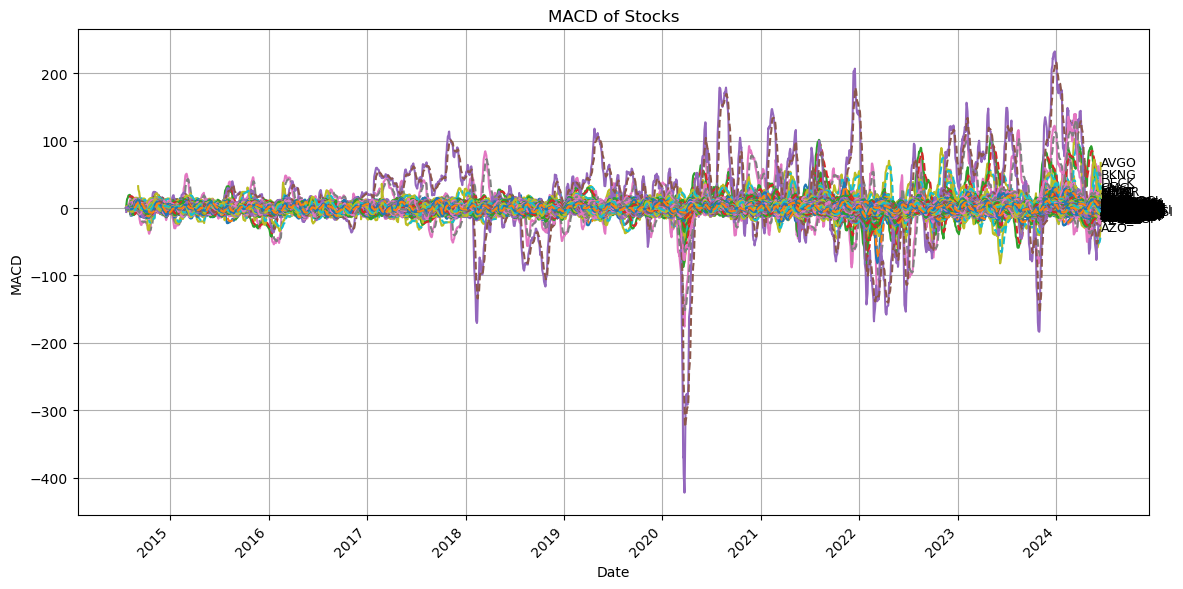

In [25]:
plt.figure(figsize=(12, 6))
for column in macd_df.columns:
    plt.plot(macd_df.index, macd_df[column], label=column)
    plt.plot(signal_df.index, signal_df[column], linestyle='--')
    
    # Adding stock names at the end of each line
    if not macd_df[column].dropna().empty:
        last_valid_value = macd_df[column].dropna().iloc[-1]
        last_valid_date = macd_df.index[macd_df[column].notna()][-1]
        if not np.isnan(last_valid_value):
            plt.text(last_valid_date, last_valid_value, column, fontsize=9, verticalalignment='center')

plt.title('MACD of Stocks')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend().set_visible(False)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Stocks such as CMG and NVR stand out due to their larger MACD values, suggesting more significant momentum changes compared to other stocks.

Extreme dips and spikes in the MACD values (e.g., around 2018 and 2020) suggest periods of high volatility for certain stocks. 2020 was a particularly volatile year for the stock market due to the COVID-19 pandemic.


* Interpretation of MACD Crossovers:

MACD above Signal Line: Indicates a bullish signal (suggesting it may be time to buy).

MACD below Signal Line: Indicates a bearish signal (suggesting it may be time to sell).




In [27]:
# Add MACD as new columns to the existing DataFrame
# Calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    macd_diff = macd - signal
    return macd, signal, macd_diff

for column in snp_prices.columns:
    macd, signal, macd_diff = calculate_macd(snp_prices[column])
    snp_prices[column + '_MACD'] = macd
    snp_prices[column + '_Signal'] = signal
    snp_prices[column + '_MACD_Diff'] = macd_diff

/tmp/ipykernel_13922/2402300529.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  snp_prices[column + '_MACD'] = macd
/tmp/ipykernel_13922/2402300529.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  snp_prices[column + '_Signal'] = signal
/tmp/ipykernel_13922/2402300529.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [29]:
snp_prices

A        AAL        AAPL        ABBV        ABNB  \
Date                                                                    
2014-06-16   38.350636  38.708969   20.416189   35.777485         NaN   
2014-06-17   38.712307  39.472584   20.389618   35.976238         NaN   
2014-06-18   38.975330  40.217354   20.411760   36.155144         NaN   
2014-06-19   38.547913  40.594448   20.340904   35.903358         NaN   
2014-06-20   38.646545  41.999138   20.130541   35.313709         NaN   
...                ...        ...         ...         ...         ...   
2024-06-10  133.029999  11.490000  193.119995  170.460007  148.070007   
2024-06-11  132.110001  11.280000  207.149994  167.699997  147.750000   
2024-06-12  133.160004  11.500000  213.070007  166.089996  149.320007   
2024-06-13  130.570007  11.440000  214.240005  166.559998  146.100006   
2024-06-14  129.850006  11.280000  212.490005  168.589996  145.970001   

                   ABT        ACGL         ACN        ADBE         ADI  ...  \
Date                                                                    ...   
2014-06-16   32.954784   19.000000   69.856163   67.620003   44.788021  ...   
2014-06-17   32.921761   19.146667   69.594681   67.540001   44.949402  ...   
2014-06-18   33.342979   19.116667   69.746521   73.080002   44.489422  ...   
2014-06-19   33.863323   19.236668   70.058601   72.949997   44.328026  ...   
2014-06-20   33.739429   19.180000   70.117630   72.610001   44.134350  ...   
...                ...         ...         ...         ...         ...  ...   
2024-06-10  107.489998  100.580002  290.429993  459.940002  235.369995  ...   
2024-06-11  105.809998   99.580002  294.220001  462.690002  236.300003  ...   
2024-06-12  104.379997   99.160004  285.730011  459.869995  238.440002  ...   
2024-06-13  103.449997   99.150002  282.320007  458.739990  234.029999  ...   
2024-06-14  103.680000   97.260002  286.709991  525.309998  231.190002  ...   

            YUM_RSI_MACD_Diff  ZBH_RSI_MACD  ZBH_RSI_Signal  \
Date                                                          
2014-06-16                NaN           NaN             NaN   
2014-06-17                NaN           NaN             NaN   
2014-06-18                NaN           NaN             NaN   
2014-06-19                NaN           NaN             NaN   
2014-06-20                NaN           NaN             NaN   
...                       ...           ...             ...   
2024-06-10          -0.396345     -6.007629       -4.739153   
2024-06-11          -0.671262     -6.260634       -5.043449   
2024-06-12          -0.727171     -6.669988       -5.368757   
2024-06-13          -0.216923     -6.666110       -5.628227   
2024-06-14          -0.350296     -6.757580       -5.854098   

            ZBH_RSI_MACD_Diff  ZBRA_RSI_MACD  ZBRA_RSI_Signal  \
Date                                                            
2014-06-16                NaN            NaN              NaN   
2014-06-17                NaN            NaN              NaN   
2014-06-18                NaN            NaN              NaN   
2014-06-19                NaN            NaN              NaN   
2014-06-20                NaN            NaN              NaN   
...                       ...            ...              ...   
2024-06-10          -1.268476      -7.869777        -4.433391   
2024-06-11          -1.217185      -8.400116        -5.226736   
2024-06-12          -1.301231      -8.958366        -5.973062   
2024-06-13          -1.037883      -8.648301        -6.508110   
2024-06-14          -0.903482      -8.979906        -7.002469   

            ZBRA_RSI_MACD_Diff  ZTS_RSI_MACD  ZTS_RSI_Signal  \
Date                                                           
2014-06-16                 NaN           NaN             NaN   
2014-06-17                 NaN           NaN             NaN   
2014-06-18                 NaN           NaN             NaN   
2014-06-19                 NaN           NaN             

## Trend Analysis

In [30]:
from sklearn.linear_model import LinearRegression

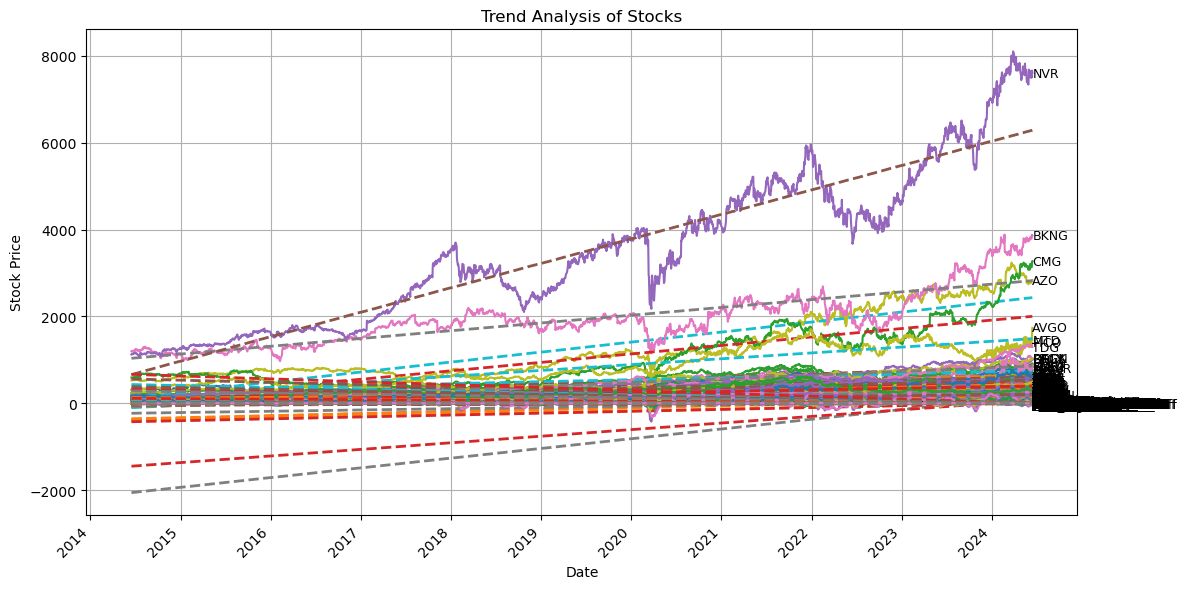

In [31]:
plt.figure(figsize=(12, 6))
for column in snp_prices.columns:
    x = np.arange(len(snp_prices)).reshape(-1, 1)
    y = snp_prices[column].values
    # Remove NaN values
    valid_mask = ~np.isnan(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]

    if len(y_valid) > 1:  # Ensure there are enough data points for linear regression
        model = LinearRegression().fit(x_valid, y_valid)
        trend = model.predict(x)

        plt.plot(snp_prices.index, snp_prices[column], label=column)
        plt.plot(snp_prices.index, trend, linestyle='--', linewidth=2)

        # Adding stock names at the end of each line
        last_valid_value = y_valid[-1]
        last_valid_date = snp_prices.index[valid_mask][-1]
        if not np.isnan(last_valid_value):
            plt.text(last_valid_date, last_valid_value, column, fontsize=9, verticalalignment='center')

plt.title('Trend Analysis of Stocks')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend().set_visible(False)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Overall Trend
Visible Outperformers:

NVR: This stock has shown a significant upward trend, indicating strong growth over the analyzed period. The stock price increased from around 0 in 2014 to over 8000 in 2024.

BKNG, CMG, and AZO: These stocks have also demonstrated considerable growth. Their trends are less steep compared to NVR but still show a consistent upward movement.
Consistent Performers:

Several stocks in the middle range show consistent upward trends, albeit less steep than the top performers. These stocks indicate steady growth, making them potentially stable investments.
Lower Performers:

Stocks at the lower end, indicated by flatter trends and lower ending prices, show minimal or no growth. These stocks might be underperforming or less volatile.

### 3 categories of trends:

In [32]:
# Calculate slopes
slopes = {}
for column in snp_prices.columns:
    x = np.arange(len(snp_prices)).reshape(-1, 1)
    y = snp_prices[column].values
    valid_mask = ~np.isnan(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    
    if len(y_valid) > 1:  # Ensure there are enough data points for linear regression
        model = LinearRegression().fit(x_valid, y_valid)
        slope = model.coef_[0]
        slopes[column] = slope

# Classify stocks based on slopes
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1])
n = len(sorted_slopes)

# Aggressive/Risky: Top stock
aggressive_stock = sorted_slopes[-1][0]

# Balanced: Middle stock
balanced_stock = sorted_slopes[n//2][0]

# Low-risk/Conservative: Bottom stock
conservative_stock = sorted_slopes[0][0]

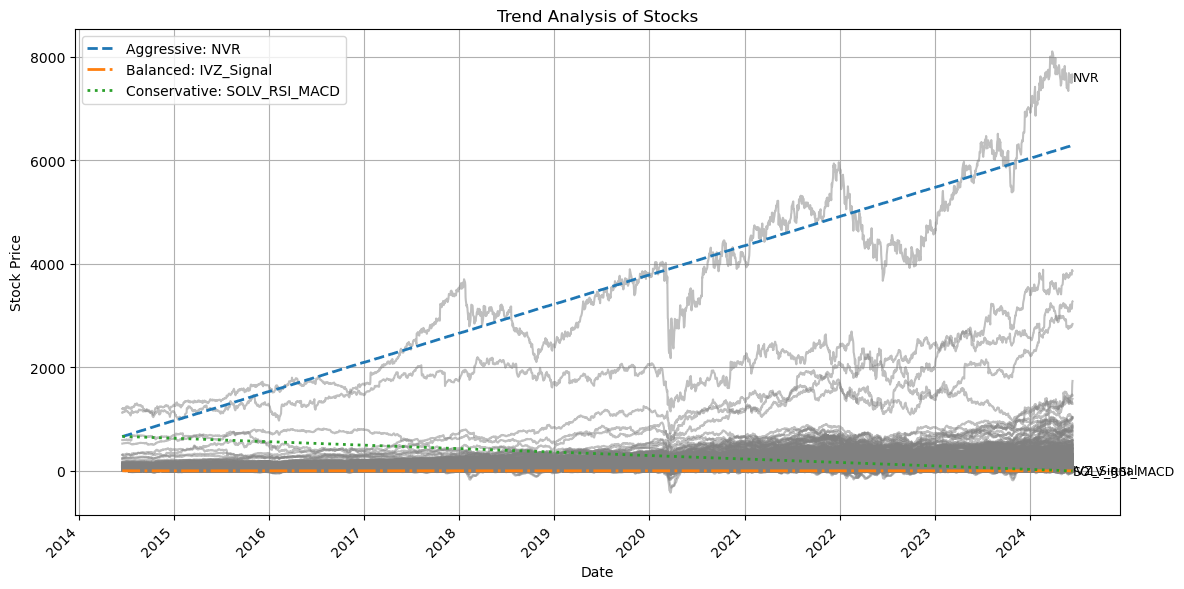

In [33]:
# Plot all stock movements
plt.figure(figsize=(12, 6))
for column in snp_prices.columns:
    plt.plot(snp_prices.index, snp_prices[column], color='grey', alpha=0.5)

# Plot representative trend lines
for category, stock, linestyle in [('Aggressive', aggressive_stock, '--'), ('Balanced', balanced_stock, '-.'), ('Conservative', conservative_stock, ':')]:
    x = np.arange(len(snp_prices)).reshape(-1, 1)
    y = snp_prices[stock].values
    valid_mask = ~np.isnan(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    model = LinearRegression().fit(x_valid, y_valid)
    trend = model.predict(x)
    plt.plot(snp_prices.index, trend, linestyle=linestyle, linewidth=2, label=f'{category}: {stock}')

# Add labels to the representative trend lines
for column in [aggressive_stock, balanced_stock, conservative_stock]:
    last_valid_value = snp_prices[column].dropna().iloc[-1]
    last_valid_date = snp_prices.index[snp_prices[column].notna()][-1]
    plt.text(last_valid_date, last_valid_value, column, fontsize=9, verticalalignment='center')

plt.title('Trend Analysis of Stocks')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Save File

In [34]:
snp_prices.head()

A        AAL       AAPL       ABBV  ABNB        ABT  \
Date                                                                      
2014-06-16  38.350636  38.708969  20.416189  35.777485   NaN  32.954784   
2014-06-17  38.712307  39.472584  20.389618  35.976238   NaN  32.921761   
2014-06-18  38.975330  40.217354  20.411760  36.155144   NaN  33.342979   
2014-06-19  38.547913  40.594448  20.340904  35.903358   NaN  33.863323   
2014-06-20  38.646545  41.999138  20.130541  35.313709   NaN  33.739429   

                 ACGL        ACN       ADBE        ADI  ...  \
Date                                                    ...   
2014-06-16  19.000000  69.856163  67.620003  44.788021  ...   
2014-06-17  19.146667  69.594681  67.540001  44.949402  ...   
2014-06-18  19.116667  69.746521  73.080002  44.489422  ...   
2014-06-19  19.236668  70.058601  72.949997  44.328026  ...   
2014-06-20  19.180000  70.117630  72.610001  44.134350  ...   

            YUM_RSI_MACD_Diff  ZBH_RSI_MACD  ZBH_RSI_Signal  \
Date                                                          
2014-06-16                NaN           NaN             NaN   
2014-06-17                NaN           NaN             NaN   
2014-06-18                NaN           NaN             NaN   
2014-06-19                NaN           NaN             NaN   
2014-06-20                NaN           NaN             NaN   

            ZBH_RSI_MACD_Diff  ZBRA_RSI_MACD  ZBRA_RSI_Signal  \
Date                                                            
2014-06-16                NaN            NaN              NaN   
2014-06-17                NaN            NaN              NaN   
2014-06-18                NaN            NaN              NaN   
2014-06-19                NaN            NaN              NaN   
2014-06-20                NaN            NaN              NaN   

            ZBRA_RSI_MACD_Diff  ZTS_RSI_MACD  ZTS_RSI_Signal  \
Date                                                           
2014-06-16                 NaN           NaN             NaN   
2014-06-17                 NaN           NaN             NaN   
2014-06-18                 NaN           NaN             NaN   
2014-06-19                 NaN           NaN             NaN   
2014-06-20                 NaN           NaN             NaN   

            ZTS_RSI_MACD_Diff  
Date                           
2014-06-16                NaN  
2014-06-17                NaN  
2014-06-18                NaN  
2014-06-19                NaN  
2014-06-20                NaN  

[5 rows x 4024 columns]

In [35]:
snp_prices.reset_index(inplace=True)

/tmp/ipykernel_13922/3104409769.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  snp_prices.reset_index(inplace=True)


In [ ]:
# Save the DataFrame as a Parquet file
snp_prices.to_parquet('snp_rsi_macd.parquet', index=False)